### Préparation du dataset

Récupération de deux images .tif (images satellites et masques) à découper en plus petites images


In [81]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [84]:
cd ..

/Users/lise/Python/projet/data


In [85]:
image_occ = cv2.imread('export_occ_sols_2019_usage.tif')
image_sat = cv2.imread('export_photo_aérienne_2019.tif')

In [86]:
image_occ[image_occ > 253] = 0

In [98]:
#image_occ_crop = image_occ[4000:4256, 4000:4256]
#plt.imshow(image_occ_crop)

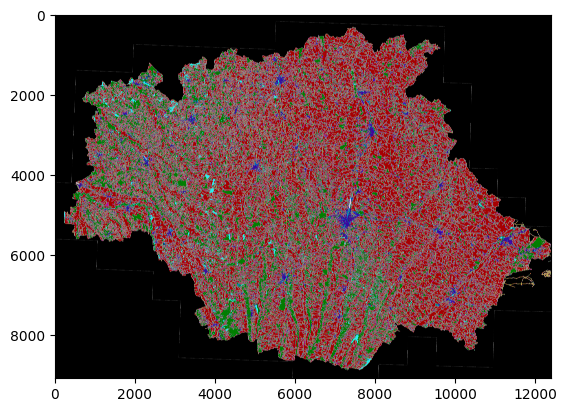

In [99]:
plt.imshow(image_occ)
plt.show()

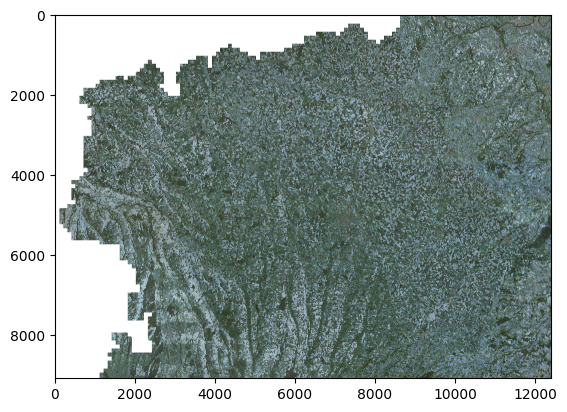

In [100]:
plt.imshow(image_sat)
plt.show()

In [101]:
img_occ_mask = cv2.cvtColor(image_occ,cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(img_occ_mask, thresh=1, maxval=255, type=cv2.THRESH_BINARY)

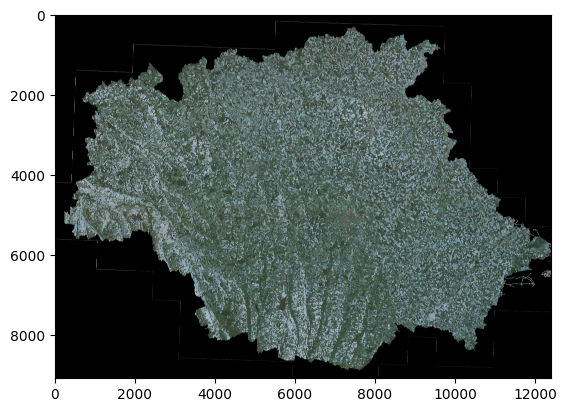

In [102]:
masked = cv2.bitwise_and(image_sat,image_sat,mask = mask)
plt.imshow(masked)

In [103]:
image_occ.shape

(9077, 12394, 3)

In [104]:
masked.shape

(9077, 12394, 3)

In [105]:
img_directory = 'image'
os.chdir(img_directory)

FileNotFoundError: [Errno 2] No such file or directory: 'image'

In [107]:
for i in range(0, 9077, 256) : 
    for j in range(0, 12394, 256) :
        img_occ_crop = image_occ[i:i+256, j:j+256]
        img_sat_crop = masked[i:i+256, j:j+256]
        
        #plt.imshow(img_sat_crop)
        #plt.show()

        filename_occ = f'{i}{j}_occ.jpg'
        filename_sat = f'{i}{j}_sat.jpg'
        
        cv2.imwrite(filename_occ,img_occ_crop)
        cv2.imwrite(filename_sat,img_sat_crop)

In [108]:
#Supprimer les images qui ont plus de la moitié de noir ? 